# EXERCISE 05 - Black-hole binary formation channels

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset.

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.

Right now, state-of-the-art analyses seems to say that many channels are all at play. Some events form in different astrophysical environments than others. You want to figure out how many of formation channels are at play.

The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \Sigma^N_{j=1}\,\alpha_j\mathcal{N}(\mu_j, \sigma_j)$

This depends on $3N - 1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability).

## IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as ax

from sklearn.mixture import GaussianMixture

In [2]:
# LOAD DATA FILE

data = np.load('formationchannels.npy')

# L06:

## Tasks

- Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

- We'll use `sklearn.mixture.GaussianMixture`. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. Today's exercise is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens all the time in research...

- Complete the fit 10 times with $N = 1, ..., 10$ Gaussians.

*Note*: `sklearn` by default will use the so-called Expectation-Maximization algorithm, which is one of the many great things in data science we don't have time to study in this class.

- For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot 
 vs AIC: which model is preferred?

- Plot the preferred solution on top of the input data. You should get a very nice fit!

# 1 - DATA EXPLORATION

Looks like there are three formation channels

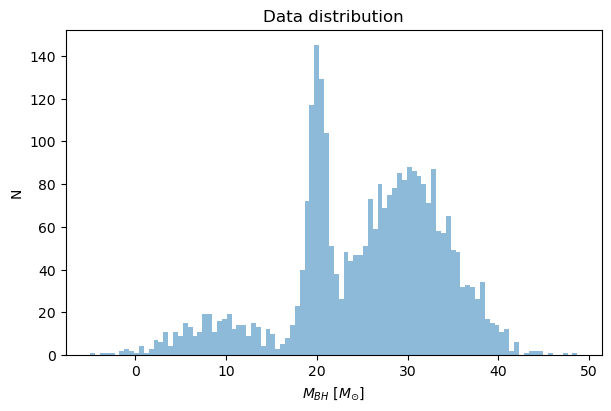

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), layout='constrained')

ax.hist(data, bins=100, density=False, alpha=.5)

ax.set_title('Data distribution')
ax.set_xlabel('$M_{BH}$ $[M_{\odot}]$')
ax.set_ylabel('N');

# 2 - FIT

Indeed the best model has three components

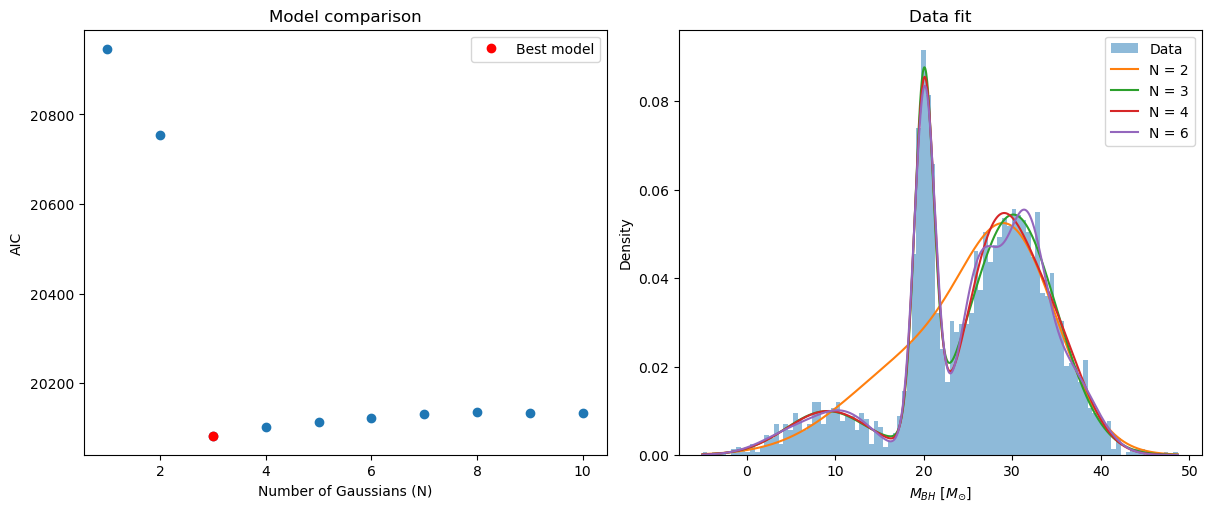

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), layout='constrained')

N = 10
n = np.arange(1, N+1)

model = []
aic = []
for i in n:
    m = GaussianMixture(i)
    model.append(m.fit(data))
    aic.append(m.aic(data))

aic = np.array(aic)

ax = axs[0]
ax.plot(n, aic, 'o')
ax.plot(np.argmin(aic)+1, aic.min(), 'o', c='r', label='Best model')

ax.legend()
ax.set_title('Model comparison')
ax.set_xlabel('Number of Gaussians (N)')
ax.set_ylabel('AIC')

ax = axs[1]
ax.hist(data, bins=100, density=True, alpha=.5, label='Data')

x = np.linspace(data.min(), data.max(), 1000)

for i in [1,2,3,5]:
    y = model[i].score_samples(x[:, np.newaxis])
    ax.plot(x, np.exp(y), label=f'N = {i+1}')

ax.legend()
ax.set_title('Data fit')
ax.set_xlabel('$M_{BH}$ $[M_{\odot}]$')
ax.set_ylabel('Density');

# OPTIONAL - RESPONSIBILITIES

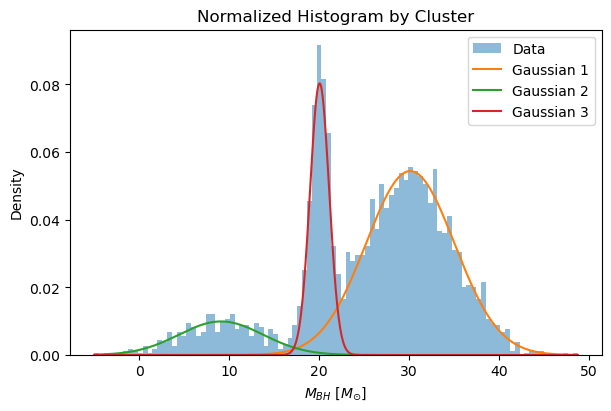

In [39]:
# thanks EmmaGPT

fig, ax = plt.subplots(1, 1, figsize=(6,4), layout='constrained')

resp = model[2].predict_proba(x.reshape(-1, 1))

ax.hist(data, bins=100, density=True, alpha = .5, label='Data')

fit = model[2].score_samples(x[:, np.newaxis])
for i in range(3):
    gaussian = resp[:, i] * np.exp(fit)
    ax.plot(x, gaussian, label=f'Gaussian {i+1}')

ax.legend()
ax.set_title("Normalized Histogram by Cluster")
ax.set_xlabel('$M_{BH}$ $[M_{\odot}]$')
ax.set_ylabel('Density');